# 1. Introduction

In [132]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(10)

## Download the prml.zip from Brightspace and extract its contents into the same folder as the assignment 1 file

## 1. Polynomial Curve Fitting

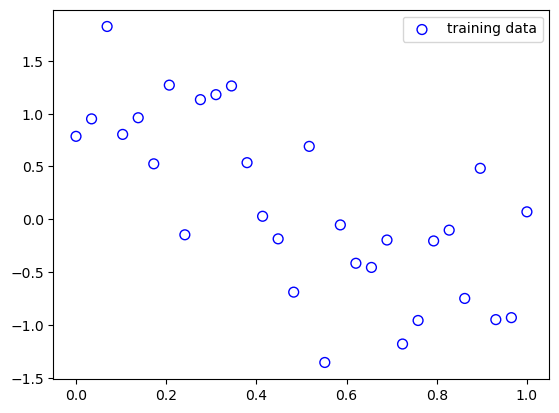

In [133]:
# Consider the given training data points

x_train = np.array([0.0,0.03448276,0.06896552,0.10344828,0.13793103,0.17241379
,0.20689655,0.24137931,0.27586207,0.31034483,0.34482759,0.37931034
,0.4137931,0.44827586,0.48275862,0.51724138,0.55172414,0.5862069
,0.62068966,0.65517241,0.68965517,0.72413793,0.75862069,0.79310345
,0.82758621,0.86206897,0.89655172,0.93103448,0.96551724,1.0])

y_train = np.array([0.78555925,0.95085481,1.82565985,0.80389519,0.96158465,0.52533655
,1.2704089,-0.14653644,1.13308122,1.1800903,1.26261986,0.53629701
,0.02880429,-0.18501542,-0.6894971,0.69057719,-1.35543259,-0.05317237
,-0.41614939,-0.4555357,-0.19606332,-1.18057323,-0.95786116,-0.20486968
,-0.10261094,-0.7491855,0.48288818,-0.94964785,-0.93100609,0.07077979])

x_test = np.array([0.0,0.02040816,0.04081633,0.06122449,0.08163265,0.10204082
,0.12244898,0.14285714,0.16326531,0.18367347,0.20408163,0.2244898
,0.24489796,0.26530612,0.28571429,0.30612245,0.32653061,0.34693878
,0.36734694,0.3877551,0.40816327,0.42857143,0.44897959,0.46938776
,0.48979592,0.51020408,0.53061224,0.55102041,0.57142857,0.59183673
,0.6122449,0.63265306,0.65306122,0.67346939,0.69387755,0.71428571
,0.73469388,0.75510204,0.7755102,0.79591837,0.81632653,0.83673469
,0.85714286,0.87755102,0.89795918,0.91836735,0.93877551,0.95918367
,0.97959184,1.0])

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.legend()
plt.show()

## 1a) Experiment with atleast four different values of M (0<=M<=9) and plot graphs for each result

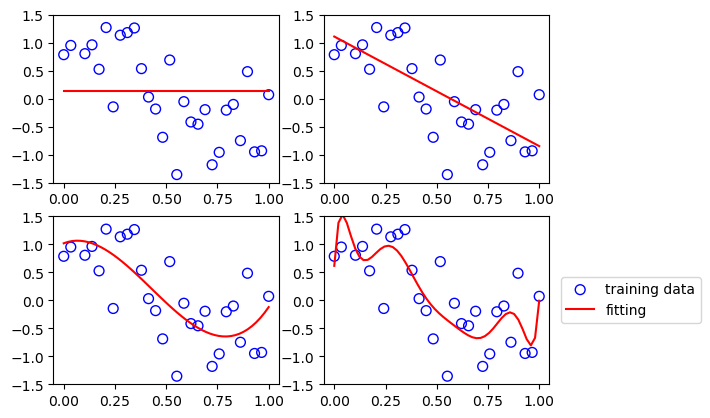

In [134]:
#your code is here, for 4 chosen values of M, I got the following fitted curves
M=[0,1,3,9]
for i, degree in enumerate(M):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    model = LinearRegression() 
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

## 1b) Which degree of polynomial fits the best and why?

## 2. Polynomial Features

#### Consider x_train, y_train, and x_test from section 1 to predict y. 
#### Use below y_test data to calculate RMSE 

In [135]:
# Test Data

y_test = np.array([8.00000000e-01,7.96303292e-01,7.85247323e-01,7.66934282e-01
,7.41533410e-01,7.09279439e-01,6.70470483e-01,6.25465193e-01
,5.74679470e-01,5.18582714e-01,4.57693336e-01,3.92574028e-01
,3.23826672e-01,2.52086583e-01,1.78016731e-01,1.02301726e-01
,2.56412705e-02,-5.12561929e-02,-1.27679921e-01,-2.02923660e-01
,-2.76292060e-01,-3.47106996e-01,-4.14714049e-01,-4.78488439e-01
,-5.37840717e-01,-5.92222394e-01,-6.41130886e-01,-6.84114214e-01
,-7.20775092e-01,-7.50774732e-01,-7.73835892e-01,-7.89745426e-01
,-7.98356313e-01,-7.99588973e-01,-7.93432012e-01,-7.79942333e-01
,-7.59244595e-01,-7.31530100e-01,-6.97054971e-01,-6.56137798e-01
,-6.09156768e-01,-5.56546051e-01,-4.98791833e-01,-4.36427922e-01
,-3.70030644e-01,-3.00213593e-01,-2.27622070e-01,-1.52926916e-01
,-7.68184085e-02,-1.46957616e-16])

### 2a) Plot a graph showing the training RMSE and test RMSE for various values of M (Degree)

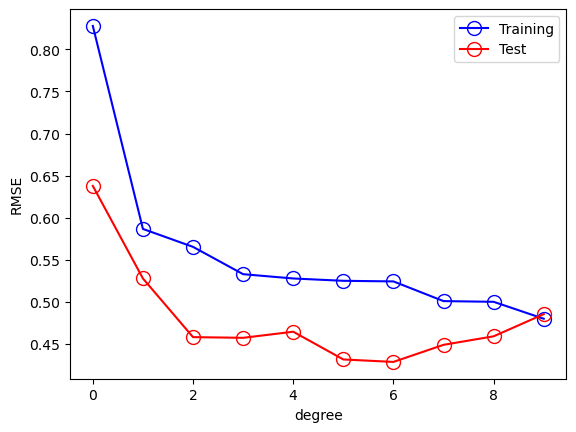

In [136]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))
training_errors = []
test_errors = []
for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))
plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

### 2b) Explain your observations and which value of M do you think is the best choice for the given data?

#your answer is here
We know that as the polynomial degree increases, the training RMSE decreases, showing that the model fits the training data better.
That means polynomial degree is inversely proportional to the training RMSE.
The model performs best on new data with moderate polynomial degrees. The test RMSE decreases from M=0 to M=3, but it sharply increases beyond M=3. This means the model overfits the training data and can't generalize well with higher polynomial degrees.
To determine the ideal M value, we look at the test RMSE, which measures how well the model can predict future data. We want this value to be as low as possible. In this case, M=3 seems to be the best choice based on the plot.

### 3. Regularization

#Experiment with atleast 4 different orders of polynomials and for each order use atleast 3 different values of alpha to implement Ridge Regression

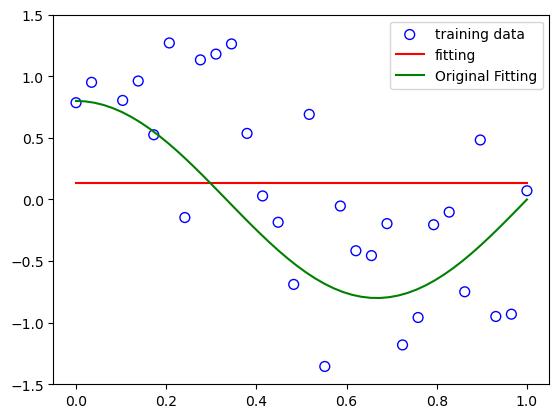

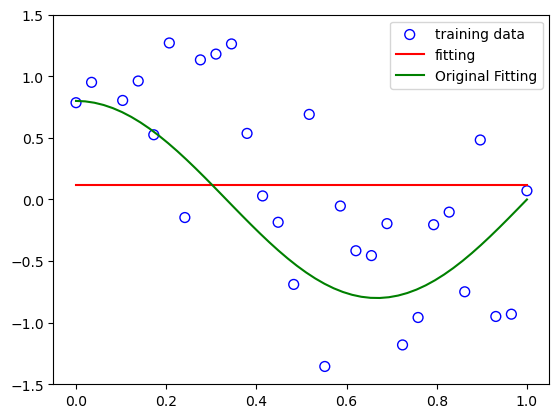

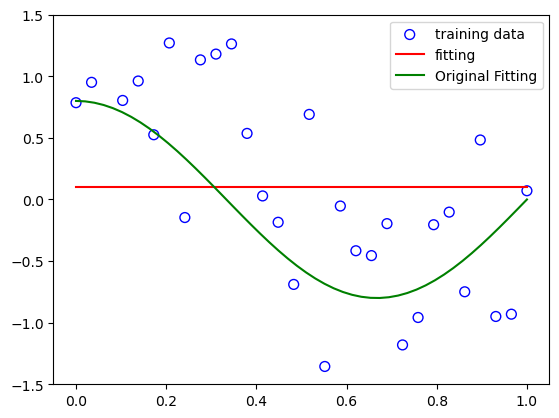

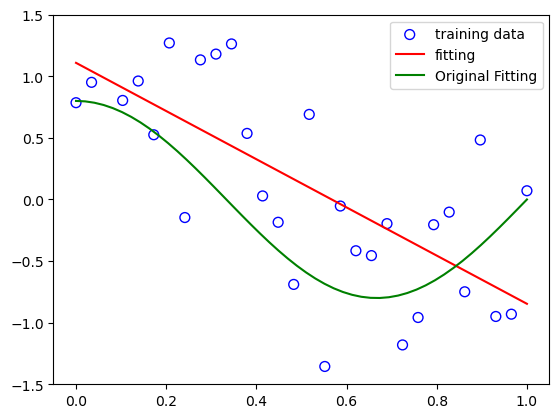

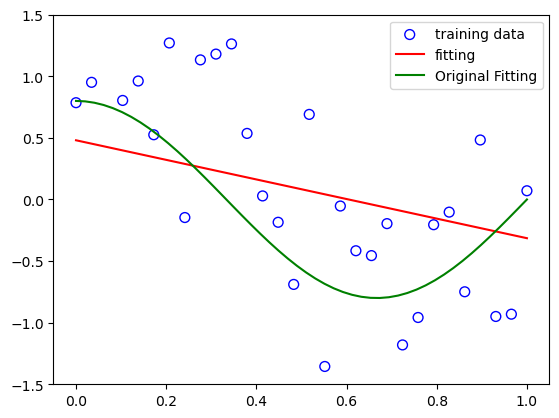

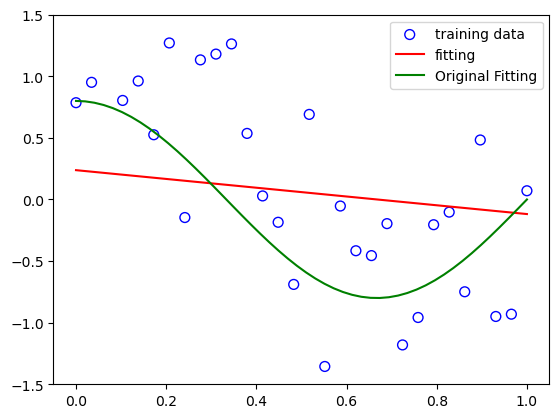

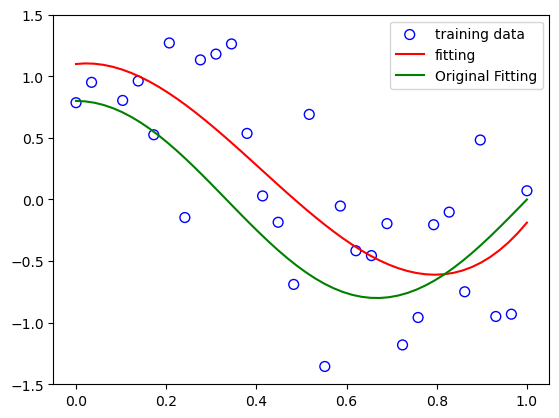

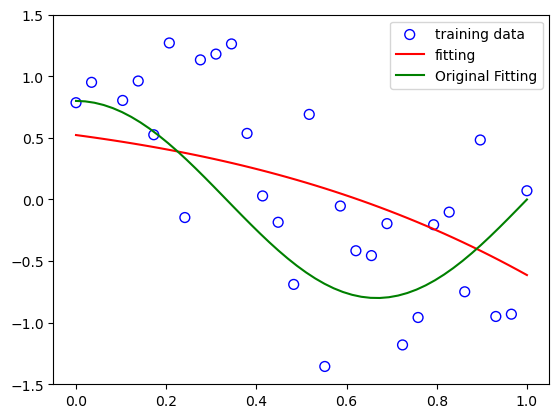

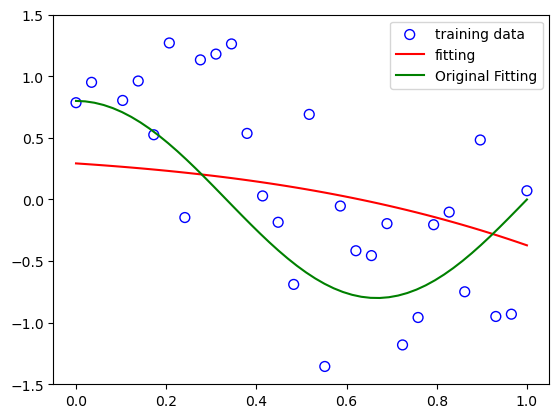

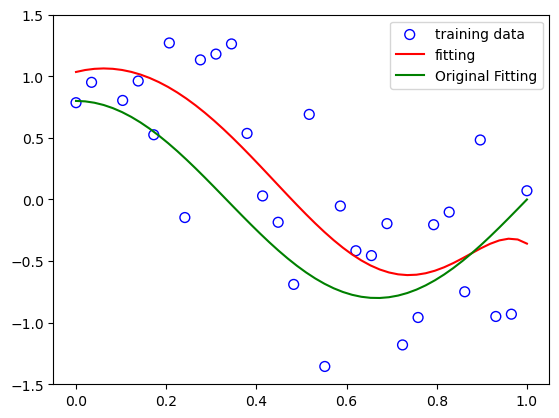

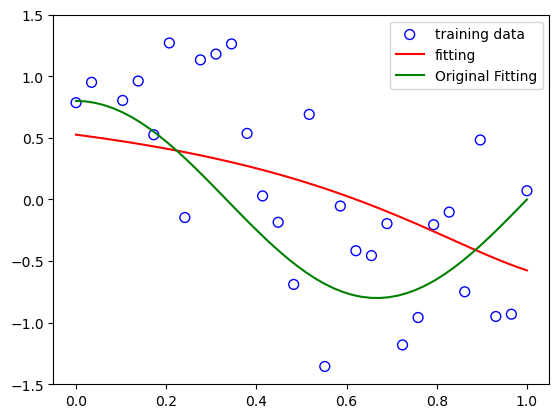

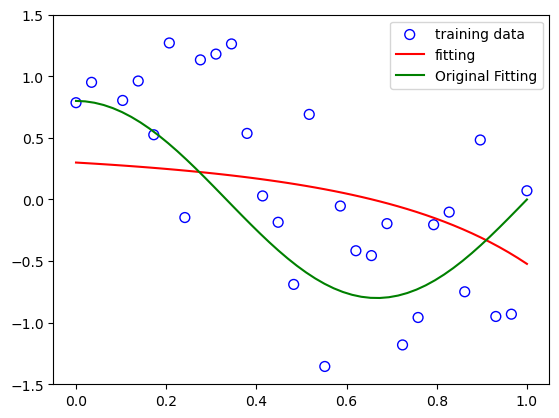

In [137]:
#your code goes here, one example curve from my implementation was like below.
M=[0,1,3,9]
alpha=[1e-3,3,9]
for i,j in enumerate(M):
    for k,l in enumerate(alpha):
        feature = PolynomialFeature(j)
        X_train = feature.transform(x_train)
        X_test = feature.transform(x_test)
        model = RidgeRegression(alpha=l)
        model.fit(X_train, y_train)
        y = model.predict(X_test)
        y = model.predict(X_test)
        plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
        plt.plot(x_test, y, c="r", label="fitting")
        plt.plot(x_test,y_test,c="g",label="Original Fitting")
        plt.ylim(-1.5, 1.5)
        plt.legend()
        plt.annotate("M={},alpha={}".format(j,alpha), xy=(-0.15, 1))
        plt.show()

## The dataset generating functions are below

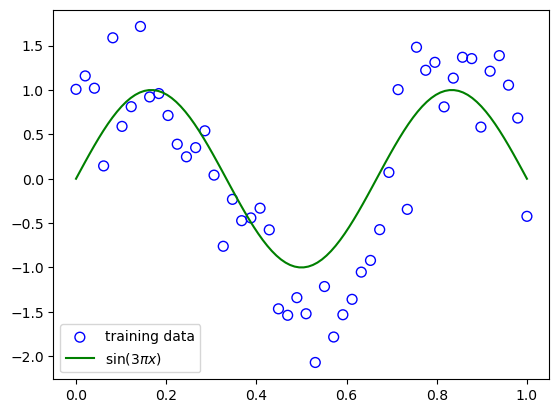

In [138]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)#Return evenly spaced numbers over a specified interval [0, 1].
    t = func(x) + np.random.normal(scale=std, size=x.shape) #Draw random samples from a normal (Gaussian) distribution.
    return x, t
def func(x):
    return np.sin(3 * np.pi * x)
#an example dataset using std=0.7 is as follows
x_train, y_train = create_toy_data(func, 50, 0.7)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(3\pi x) $")
plt.legend()
plt.show()

## Create atleast 2 datasets using different types of values (e.g., small or large) for std in the create_toy_data() and choosing a different func(), which was considered as a sinosoid for my example


# Repeat section 1a,1b,2a,2b, and 3 for the datasets generated above

## Function is COS(4πx)


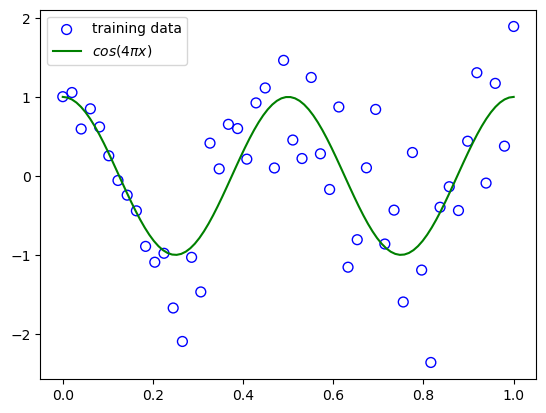

In [139]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)#Return evenly spaced numbers over a specified interval [0, 1].
    t = func(x) + np.random.normal(scale=std, size=x.shape) #Draw random samples from a normal (Gaussian) distribution.
    return x, t
def func(x):
    return np.cos(4 * np.pi * x)
x_train, y_train = create_toy_data(func, 50,0.6)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\tcos(4\pi x) $")
plt.legend()
plt.show()

Curve Fitting for the function COS(4πx)

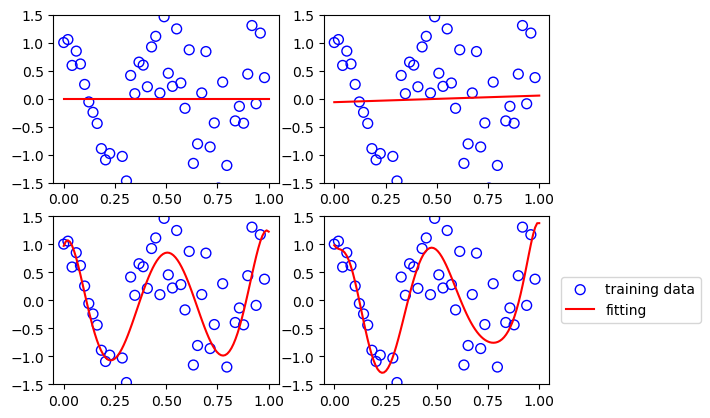

In [140]:
M=[0,1,6,9]
for i, degree in enumerate(M):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    model = LinearRegression() 
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()


For M= 0< n < 6, the curve is underfitting.
For M=9, the curve is overfitting.
So,based on the plots I've created, I think that using a polynomial degree of M=6 is the best fit for our data. 
This choice seems to result in the lowest prediction error when we tested the model on our test data. 
Actually, we can observe from the plot that only at M=6 the curve is good fit for the given function.
It also doesn't appear to be overly complex (overfitting) or too simple (underfitting) for our dataset. 
This decision is based on my analysis of the graphs and how well the model performs with the test data.

RMSE for the function COS(4πx)

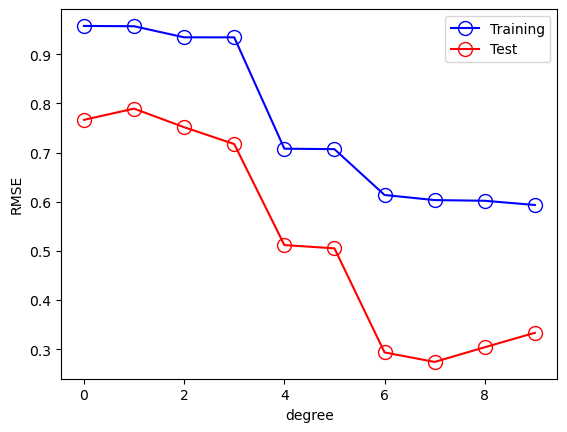

In [141]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))
training_errors = []
test_errors = []
for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))
plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

We can clearly observe that at M=6 both the training and test RMSE are having lesser values, after M=6 the values are almost constant.
Hence, according to my analysis M=6 seems to be the best choice based on the plot.

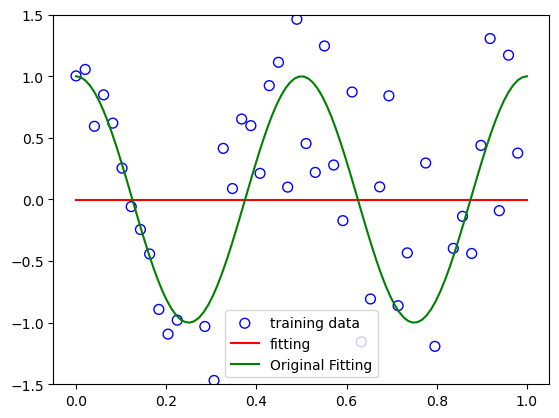

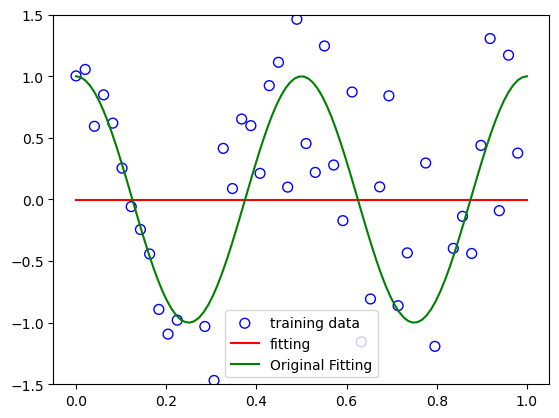

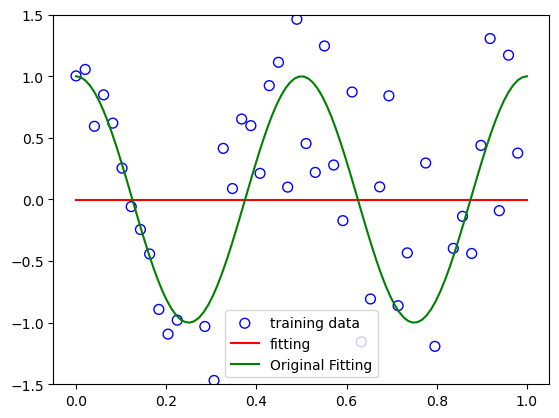

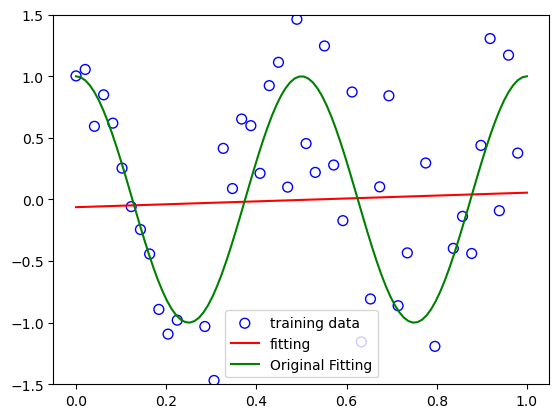

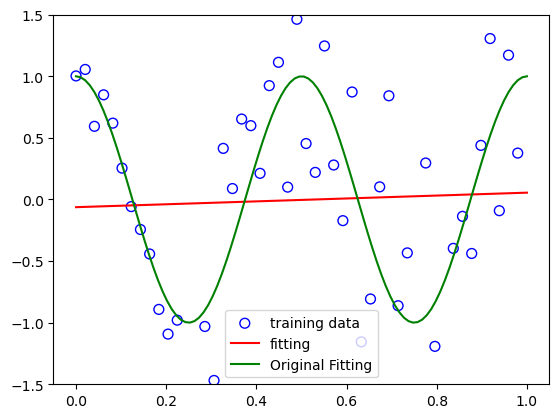

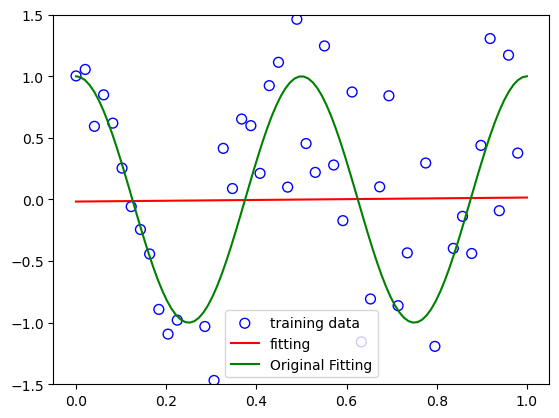

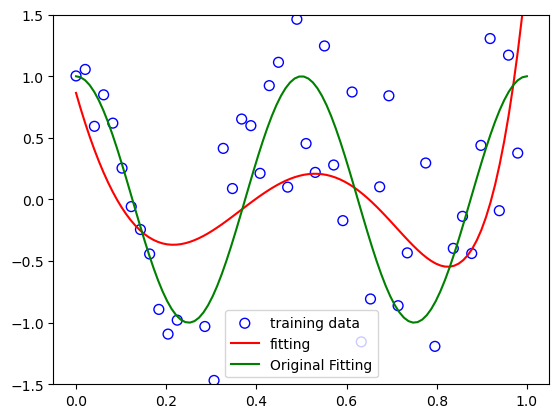

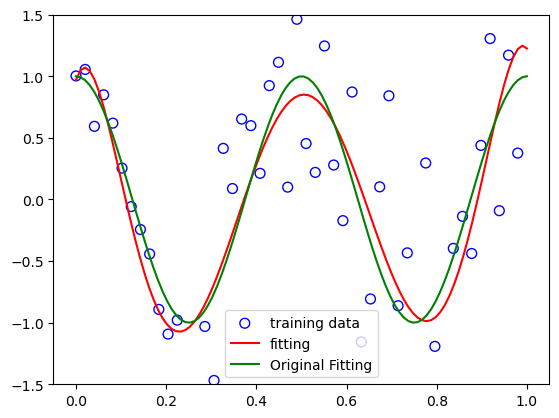

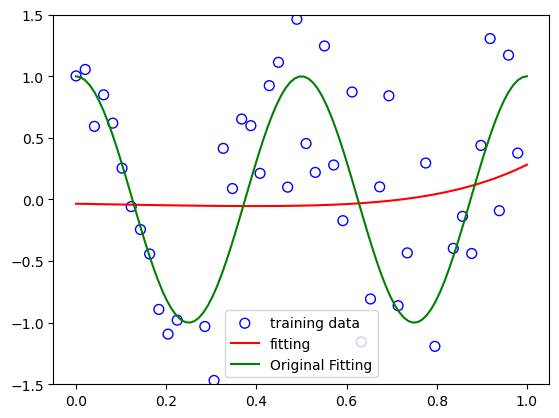

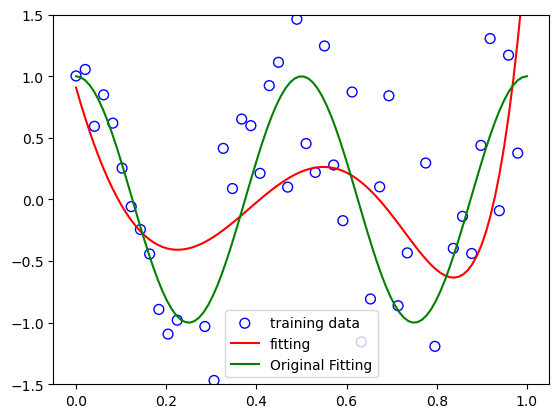

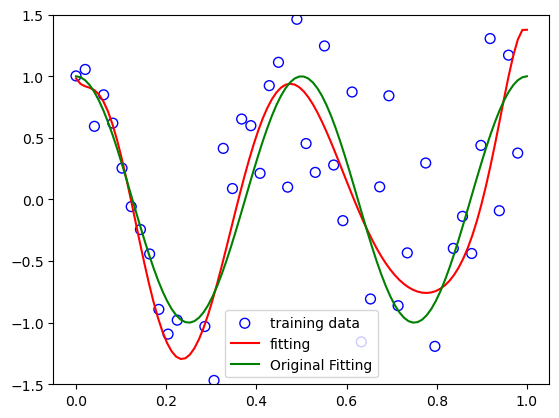

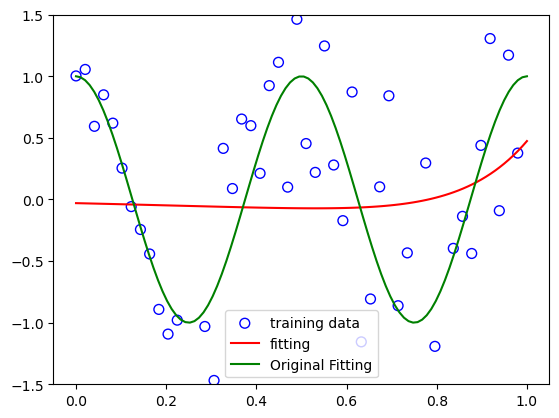

In [144]:
M=[0,1,6,9]
alpha=[1e-3,0,9]
for i,j in enumerate(M):
    for k,l in enumerate(alpha):
        feature = PolynomialFeature(j)
        X_train = feature.transform(x_train)
        X_test = feature.transform(x_test)
        model = RidgeRegression(alpha=l)
        model.fit(X_train, y_train)
        y = model.predict(X_test)
        y = model.predict(X_test)
        plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
        plt.plot(x_test, y, c="r", label="fitting")
        plt.plot(x_test,y_test,c="g",label="Original Fitting")
        plt.ylim(-1.5, 1.5)
        plt.legend()
        plt.annotate("M={},alpha={}".format(j,l), xy=(-0.15, 1))
        plt.show()

## Function is SQRT(6πx)

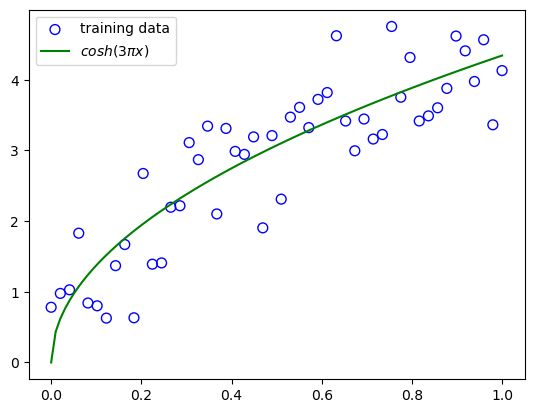

In [145]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)#Return evenly spaced numbers over a specified interval [0, 1].
    t = func(x) + np.random.normal(scale=std, size=x.shape) #Draw random samples from a normal (Gaussian) distribution.
    return x, t
def func(x):
    return np.sqrt(6 * np.pi * x)
x_train, y_train = create_toy_data(func, 50,0.6)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\tcosh(3\pi x) $")
plt.legend()
plt.show()


Curve Fitting for Function SQRT(6πx)

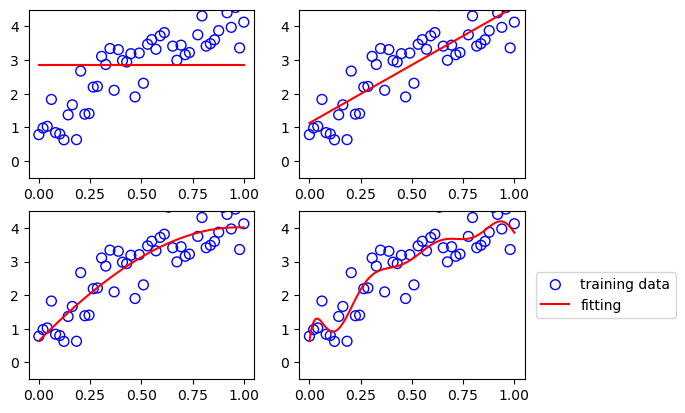

In [146]:
M=[0,1,3,9]
for i, degree in enumerate(M):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    model = LinearRegression() 
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-0.5, 4.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()


For M= 0 < n < 3, the curve is underfitting.
For M=9, the curve is overfitting.
So,based on the plots I've created, I think that using a polynomial degree of M=3 is the best fit for our data. 
This choice seems to result in the lowest prediction error when we tested the model on our test data. 
Actually, we can observe from the plot that only at M=3 the curve is good fit for the given function.
It also doesn't appear to be overly complex (overfitting) or too simple (underfitting) for our dataset. 
This decision is based on my analysis of the graphs and how well the model performs with the test data.

RMSE for the function SQRT(6πx)

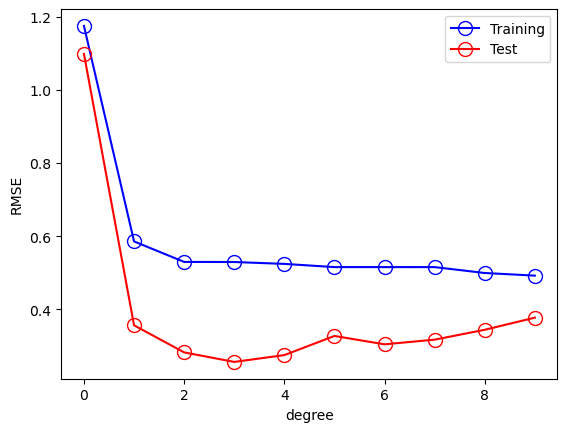

In [147]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))
training_errors = []
test_errors = []
for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))
plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

We can clearly observe that at M=3 both the training and test RMSE are having lesser values, after M=3 the values are almost constant.
Hence, according to my analysis M=3 seems to be the best choice based on the plot.

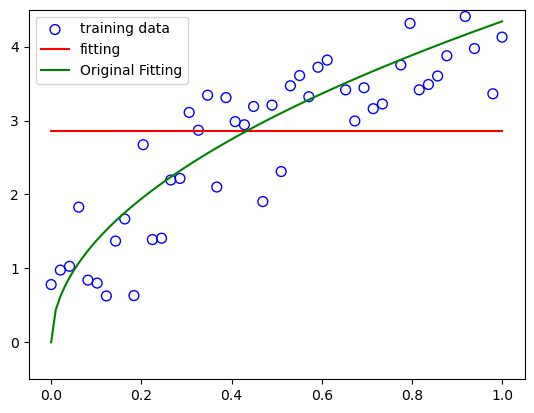

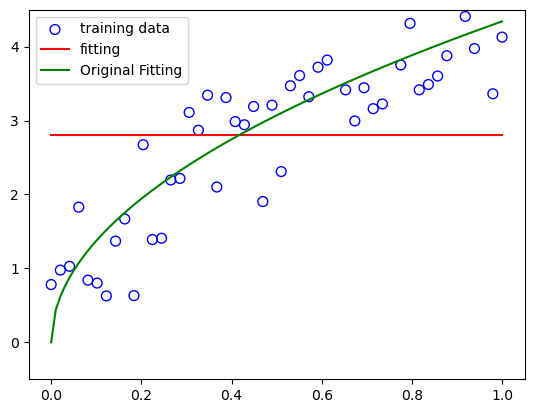

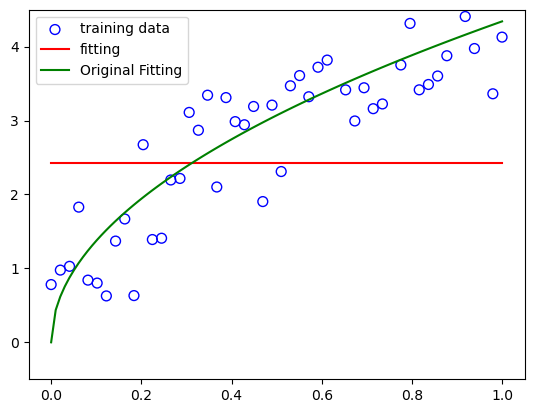

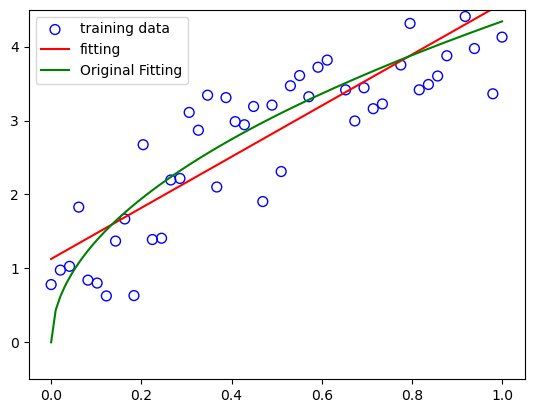

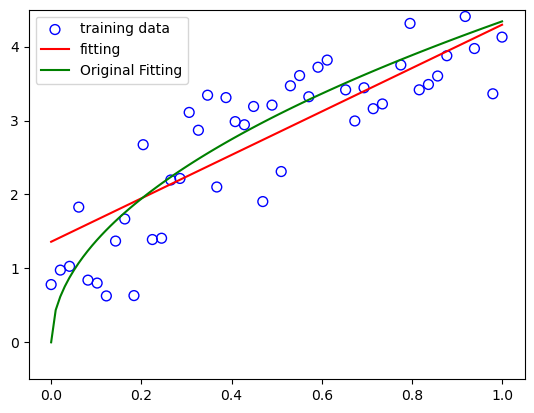

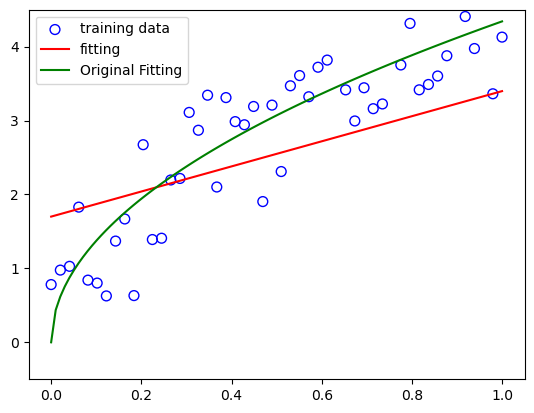

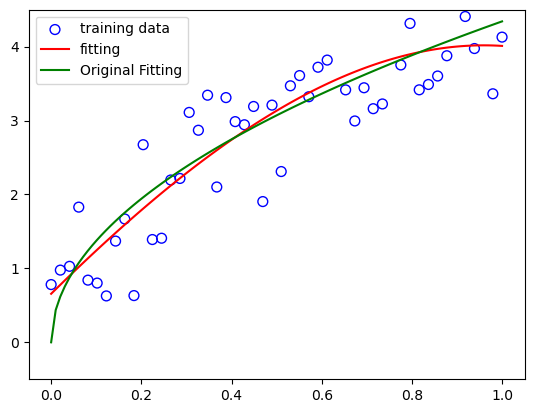

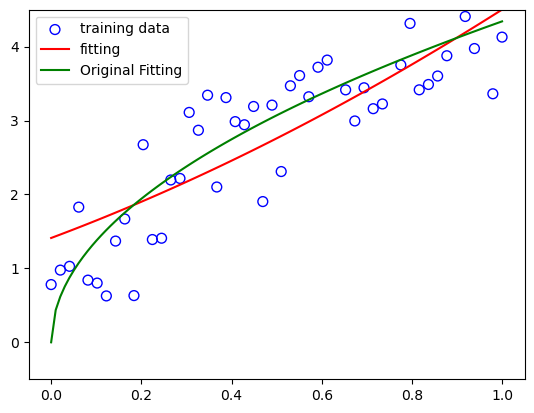

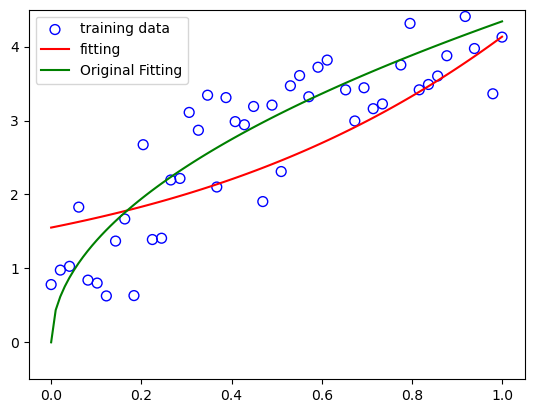

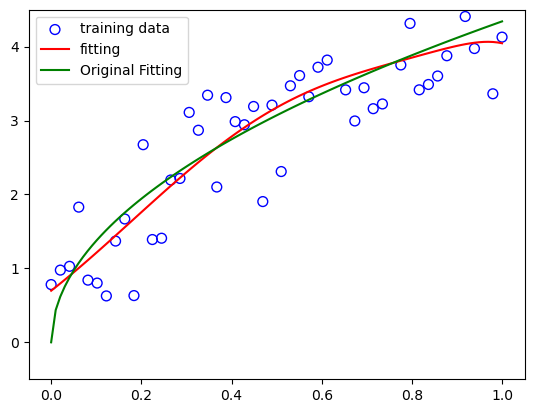

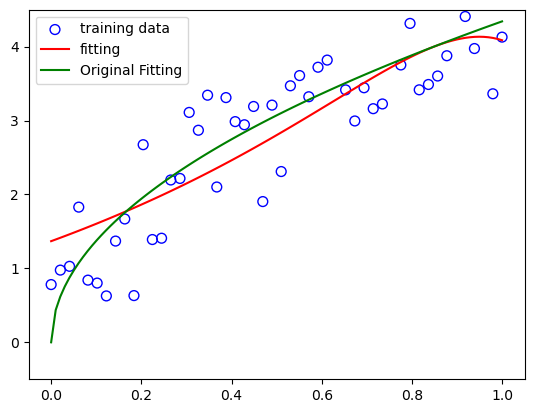

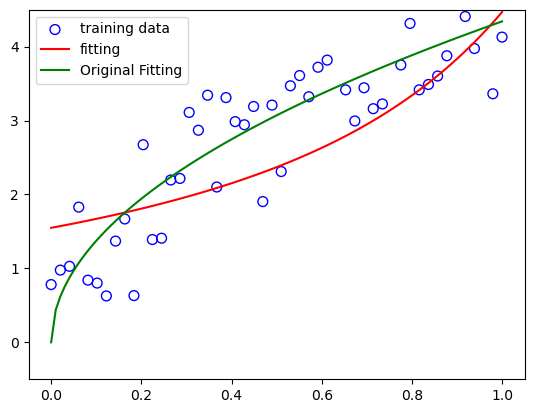

In [148]:
M=[0,1,3,9]
alpha=[1e-3,1,9]
for i,j in enumerate(M):
    for k,l in enumerate(alpha):
        feature = PolynomialFeature(j)
        X_train = feature.transform(x_train)
        X_test = feature.transform(x_test)
        model = RidgeRegression(alpha=l)
        model.fit(X_train, y_train)
        y = model.predict(X_test)
        y = model.predict(X_test)
        plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
        plt.plot(x_test, y, c="r", label="fitting")
        plt.plot(x_test,y_test,c="g",label="Original Fitting")
        plt.ylim(-0.5, 4.5)
        plt.legend()
        plt.annotate("M=9", xy=(-0.15, 1))
        plt.show()